In [1]:
%run "../../../common/0_notebooks_base_setup.py"    

c:\Users\fpeloso\Digital House\Prácticas mías\Practica-de-Clases\clase_04\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Estadística Descriptiva

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Estadística Descriptiva](#section_descriptive)

[Cuarteto de Ansombe](#section_anscombe)

---

## Estadística

<a id="section_intro"></a> 
### Intro
[volver a TOC](#section_toc)

En esta parte vamos a revisar conceptos de estadística descriptiva.

La estadística descriptiva busca describir, sumarizar y comprender los datos.

Para ello empleamos Medidas de Tendencia Central, y medidas de Variabilidad.

La función de las Medidas de Tendencia Central es proveer información descriptiva sobre el valor numérico que es considerado el más usual para una variable cuantitativa.

Las medidas de tendencia central son
* **Media**

Dados los n números ${\{x_{1},x_{2},\ldots ,x_{n}\}}$ la media aritmética se define como: 

\begin{equation}
    \bar {x} = {\frac {1}{n}} \sum _{i=1}^{n}x_{i} ={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}
\end{equation}

* **Mediana**

Sean ${ x_{1},x_{2},x_{3},\ldots ,x_{n} }$ los datos de una muestra ordenada en orden creciente y designando la mediana como $M_{e}$, distinguimos dos casos:

a) Si n es impar, la mediana es el valor que ocupa la posición $(n+1)/2$ una vez que los datos han sido ordenados (en orden creciente o decreciente), porque este es el valor central. Es decir: $M_{e}=x_{{(n+1)/2}}$.

b) Si n es par, la mediana es la media aritmética de los dos valores centrales. Cuando $n$ es par, los dos datos que están en el centro de la muestra ocupan las posiciones $n/2$ y $(n/2)+1$. Es decir: $M_{e}=(x_{{{\frac{n}{2}}}}+x_{{{{\frac{n}{2}}}+1}})/2$.


* **Moda**

Es el valor del dato con mayor frecuencia en un conjunto.

Las medidas de variabilidad o dispersión nos indican si los valores de los datos están próximos entre sí o si 
por el contrario están muy dispersos. Estas medidas se determinan en función de la distancia entre los datos y algún estadístico de tendencia central.

Las medidas de variabilidad son
* **Rango**

Sean ${ x_{1},x_{2},x_{3},\ldots ,x_{n} }$ los datos de una muestra ordenada en orden creciente, el rango es $x_{n} - x_{1}$


* **Varianza**

Si tenemos un conjunto de valores de una variable, la varianza se calcula de la siguiente forma:

\begin{equation}
\sigma_{n}^{2} = \frac{1}{n} \sum _{i=1}^{n} (x_i - \bar{X})^{2}
\end{equation}

Siendo:

$x_{i}$: cada dato

$\bar{X}$: media de los datos

$n$: número de datos


* **Desvío Estándar**

Es la raíz cuadrada de la varianza

\begin{equation}
\sigma_{n} = \sqrt{\frac{1}{n} \sum _{i=1}^{n} (x_i - \bar{X})^{2}}
\end{equation}


* **Coeficiente de Variación**

Es el desvío estándar dividido por la media

\begin{equation}
CV = \frac{\sigma_{n}}{\bar{X}} . 100 
\end{equation}




NumPy tiene funciones para calcular todas estas medidas.

---



Vamos a ver cómo calcular algunas medidas de estadística descriptiva usando Numpy.

Para eso, usaremos datos que tenemos en un csv con tres poblaciones:
* conejos
* linces 
* zanahorias

Leeremos los datos del csv usando `genfromtxt` de Numpy

La primera columna de la matriz corresponde al año, la segunda a la población de conejos, la tercera corresponde a la población de linces, y la cuarta a la población de zanahorias.

Y luego vamos a convertir en arrays, que aprendimos a usar recientemente, cada una de sus columnas. ¿Cómo hacemos esto?

In [2]:
import numpy as np

data_location = '../Data/populations.txt'
data = np.genfromtxt(data_location, skip_header=1, delimiter='\t')
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

Definimos variables con el índice que corresponde a cada población:

In [4]:
anno_col_index  = 0
conejos_col_index = 1
linces_col_index = 2
zanahorias_col_index = 3

Vamos a crear un array de Numpy para cada población y para el año, usando slicing (si no lo recuerdan, revisen la clase  de Numpy):

In [5]:
anno = data[:, anno_col_index]
#print(anno)
conejos = data[:, conejos_col_index]
#print(conejos)
linces = data[:, linces_col_index]
#print(linces)
zanahorias = data[:, zanahorias_col_index]
#print(zanahorias)

Y por último vamos crear una variable poblaciones, que tenga todos los datos de la matriz data menos la columna "# year"

In [6]:
poblaciones = data[:, 1:]
poblaciones

array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.],
       [20600., 41700., 39800.],
       [18100., 19000., 38600.],
       [21400., 13000., 42300.],
       [22000.,  8300., 44500.],
       [25400.,  9100., 42100.],
       [27100.,  7400., 46000.],
       [40300.,  8000., 46800.],
       [57000., 12300., 43800.],
       [76600., 19500., 40900.],
       [52300., 45700., 39400.],
       [19500., 51100., 39000.],
       [11200., 29700., 36700.],
       [ 7600., 15800., 41800.],
       [14600.,  9700., 43300.],
       [16200., 10100., 41300.],
       [24700.,  8600., 47300.]])

<a id="section_descriptive"></a> 
### Estadística descriptiva
[volver a TOC](#section_toc)

Para cada variable de la serie histórica, calculamos la media y el desvío. Redondeamos los valores para que tengan sólo 2 decimales.

Vamos a usar los métodos de Numpy
* **mean**: calcula la media de los valores pasados en el primer parámetro https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
* **std**: calcula el desvio standard de los valores pasados en el primer parámetro  https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
* **around**: redondea los valores a la cantidad de decimales pasada como parámetro, el default es 0 https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html



Ahora vamos a calcular la media de cada una de las poblaciones usando la matriz `poblaciones` y el método `mean` de Numpy, redondenado a dos decimales.

¿Qué valor de `axis` debemos usar? ¿Por qué?

Respuesta: Cada población está representada por una columna en la matriz poblaciones, por lo tanto para calcular la media por población debemos colapsar las filas, y para eso el valor de axis debe ser 0

In [7]:
print ("        Conejos, Linces, Zanahorias")
print ("Mean:", np.around(poblaciones.mean(axis=0), decimals=2))
print ("Std:", np.around(poblaciones.std(axis=0), decimals=2))

        Conejos, Linces, Zanahorias
Mean: [34080.95 20166.67 42400.  ]
Std: [20897.91 16254.59  3322.51]


A continuación, calculamos para cada especie el año en el que tuvieron máxima población. 

Para eso vamos a usar el método `argmax` de Numpy que devuelve el índice en el array del valor máximo https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

Igual que en el punto anterior, las poblaciones están representadas por columnas, entonces debemos colapsar filas y así axis debe tener valor 0. 

`indice_max_poblacion` tendrá tantos elementos como poblaciones considero (3 en este caso: conejos, linces, zanahorias) y cada elemento será **el índice de la fila** donde esa población tuvo la máxima cantidad de individuos.

In [8]:
indice_max_poblacion = np.argmax(poblaciones, axis=0)
indice_max_poblacion

array([3, 4, 0], dtype=int64)

Por lo tanto, la población de conejos fue máxima en la cuarta fila, la de linces en la quinta fila, la de zanahorias en la primer fila.

Veamos a que años corresponden esas filas, usando Fancy indexing (si no lo recuerdan, por favor revisen la guía de numpy1!)

In [9]:
annos_con_maximos = anno[indice_max_poblacion]
annos_con_maximos

array([1903., 1904., 1900.])

Entonces la máxima población de conejos fue en 1903, la de linces fue en 1904, y la de zanahorias fue en 1900

In [10]:
# Fancy Indexing
print ("                          Conejos, Linces, Zanahorias")
print ("Años de máxima población:", anno[indice_max_poblacion])

                          Conejos, Linces, Zanahorias
Años de máxima población: [1903. 1904. 1900.]


Como adicional, vamos a graficar estas tres poblaciones para ver si los resultados que obtuvimos se corresponden con los graficados. 

En unos días vamos a tener una clase de visualización y veremos en detalle bibliotecas como `matplotlib` que usamos ahora de forma muy básica.

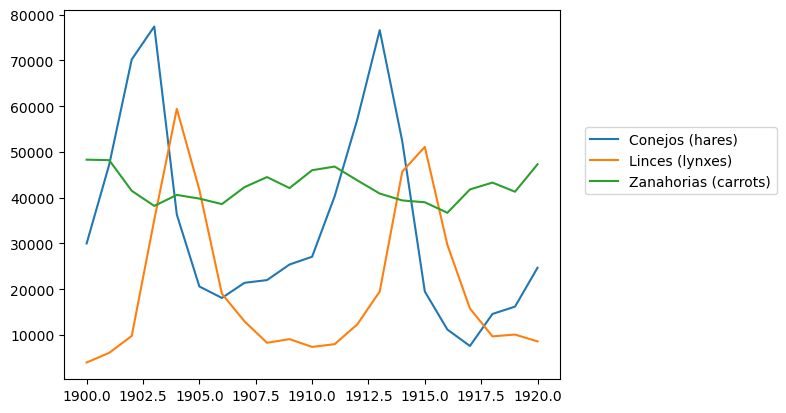

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(anno, conejos, anno, linces, anno, zanahorias) 
plt.legend(('Conejos (hares)', 'Linces (lynxes)', 'Zanahorias (carrots)'), loc=(1.05, 0.5)) 
plt.show()

<div id="ejercicio1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
    <div style="float:left;width: 85%;"><label>
<b>Ejercicio</b>:
    
¿En qué años alguna de las poblaciones se encuentra por encima de 50000?
    
Ayuda: boolean indexing
    
Ayuda 2: podemos resolverlo usando la matriz poblaciones o usando los array de poblaciones por separado
    
Podemos autocorregir los ejercicios mirando el gráfico</label></div>
</div>
    


In [18]:
mascara = poblaciones>50000
#print(mascara)
columna_booleana=np.max(mascara,axis=1)
print(columna_booleana)
anno[columna_booleana]
mascara

[False False  True  True  True False False False False False False False
  True  True  True  True False False False False False]


array([[False, False, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

<div id="ejercicio2" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
    <div style="float:left;width: 85%;"><label>
<b>Ejercicio</b>:
    
¿En qué dos años, cada especie tuvo sus niveles más bajos de población?

Ayuda: pueden buscar la documentación de `argsort` de Numpy
    
Ayuda 2: podemos resolverlo usando la matriz poblaciones o usando los array de poblaciones por separado
    
Podemos autocorregir los ejercicios mirando el gráfico</label></div>
</div>
    

In [29]:
indice_min_poblacion = np.argsort(poblaciones,axis=0)
print(indice_min_poblacion)
mascara_min= indice_min_poblacion<2

print(indice_min_poblacion[:,0])

anno_min_conejos=anno[mascara_min[:,0]]
anno_min_conejos

anno_min_conejos=anno[mascara_min[:,0]]
print(anno_min_conejos)

anno_min_lince=anno[mascara_min[:,1]]
print(anno_min_lince)

anno_min_zana=anno[mascara_min[:,2]]
print(anno_min_zana)

[[17  0 16]
 [16  1  3]
 [18 10  6]
 [19 11 15]
 [ 6  8 14]
 [15 20  5]
 [ 5  9  4]
 [ 7 18 13]
 [ 8  2 19]
 [20 19  2]
 [ 9 12 17]
 [10  7  9]
 [ 0 17  7]
 [ 4  6 18]
 [11 13 12]
 [ 1 16  8]
 [14  3 10]
 [12  5 11]
 [ 2 14 20]
 [13 15  1]
 [ 3  4  0]]
[17 16 18 19  6 15  5  7  8 20  9 10  0  4 11  1 14 12  2 13  3]
[1912. 1915.]
[1900. 1901.]
[1919. 1920.]


#### Covarianza

La covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. 

Es el dato básico para determinar si existe una dependencia entre ambas variables 

El método que calcula la covarianza en Numpy es `cov`
https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html

In [ ]:
np.cov([conejos, linces, zanahorias])

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Ahora intentemos responder estas preguntas:

      
* **¿Puedo comparar las distintas varianzas? ¿Por qué?**

Si las variables se miden en las misma unidades y sus valores son de magnitudes parecidas, puedo comparar sus varianzas. Pero sólo en ese caso y no en general.

* **¿Qué variable tiene la mayor varianza? ¿Cómo se ve esto en el gráfico?**

Podemos mirar los valores de la diagonal de la matriz de covarianzas para obtener los valores de las varianzas de esas variables. 

La variable de mayor varianza es el conejo, su valor está en el elemento (0,0) de la matriz de varianzas y covarianzas. 

En el gráfico podemos ver que la dispersión de la serie de los conejos es parecida a la serie de los linces, pero la serie de conejos tiene mayor rango (diferencia entre los valores máximo y mínimo) por lo tanto aporta más en la suma de distancias a la media.

* **¿Qué significa una covarianza positiva? ¿Y una negativa?**

Dos variables X e Y, tienen covarianza positiva cuando tienden a encontrarse por encima de su media al mismo tiempo y tienen covarianza negativa cuando al mismo tiempo, tienden a encontrarse una por debajo y otra por encima.

En cambio X e Y tienen covarianza cercana a cero cuando las variables pueden encontrarse por encima o por debajo de su media independientemente de lo que haga la otra.

La covarianza mide la relación lineal entre ambas variables, es decir, qué tanto se asemeja la relación con una función lineal.</label></div>
</div>    



#### Correlación

El coeficiente de correlación de Pearson es una medida lineal entre dos variables aleatorias cuantitativas. 

A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.

Podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas.

El método que calcula la correlación de Pearson en Numpy es `corrcoef`. Los valores de los elementos de la matriz de correlación están entre -1 y 1 inclusive. Es equivalente a la matriz de covarianzas normalizada.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html



In [ ]:
np.corrcoef([conejos, linces, zanahorias])

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Intentemos responder estas preguntas:

* **¿Cómo es el signo de la correlación con respecto al de la covarianza?**

El signo de la correlación y la covarianza son iguales.

* **¿En qué unidades físicas está la correlación? ¿Y la covarianza?**

La covarianza tiene las unidades que la variable al cuadrado. La correlación no tiene unidades.

* **¿Cuáles son las especies que están más correlacionadas? ¿Cómo se ve esto en el gráfico?**

Las especies que están más correlacionadas son los linces y zanahorias, son los elementos de la matriz de correlación con mayor valor absoluto (módulo).

Las dos lineas que representan las series parecen "acompañarse", cuando una aumenta la otra disminuye.</label></div>
</div>    

<a id="section_anscombe"></a> 
### Extra: Cuarteto de Anscombe
[volver a TOC](#section_toc)

El cuarteto de Anscombe comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la **importancia de mirar gráficamente un conjunto de datos** antes de analizarlos.

Para los cuatro conjuntos de datos:

![Image](img/anscombe_medidas.jpg)

Los datos de los cuatro conjuntos son: 

![Image](img/anscombe_datos.jpg)

![Image](img/anscombe.jpg)

Referencia: https://es.wikipedia.org/wiki/Cuarteto_de_Anscombe


<a id=""></a> 
### Bonus
[volver a TOC](#section_toc)


<a href="https://twitter.com/JustinMatejka/status/859075295059562498">Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing</a>    

<img src="https://damassets.autodesk.net/content/dam/autodesk/www/autodesk-reasearch/Publications/images/same-stats-different-graphs-image-1920x1000.gif" width="30%" />